In [192]:
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, mean_squared_error

In [193]:
iris_X,iris_y = datasets.load_iris(return_X_y = True , as_frame = True)

In [194]:
iris_X['labels'] = iris_y
iris_X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [195]:
iris_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   labels             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


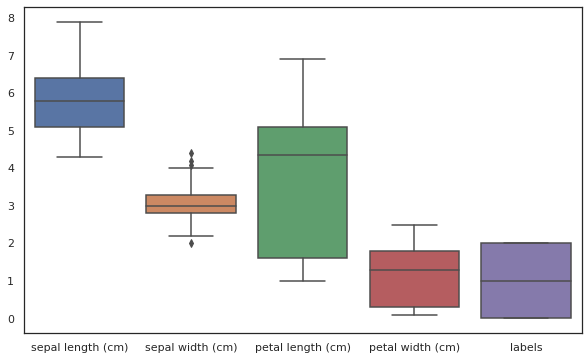

In [196]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data = iris_X);
# plt.savefig('/content/drive/MyDrive/plot/barplot')

<Figure size 432x288 with 0 Axes>

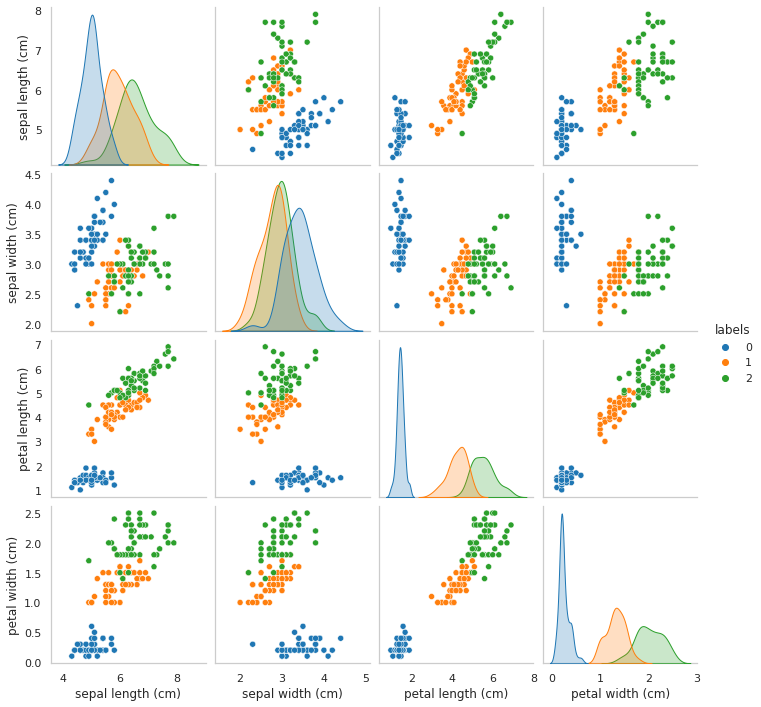

In [197]:
plt.clf()
sns.set_style("whitegrid", {'axes.grid' : False})
sns.pairplot(data=iris_X, hue='labels', palette='tab10');
# plt.savefig("/content/drive/MyDrive/plot/pair_plot")

In [198]:
from sklearn.model_selection import train_test_split
iris_X = iris_X.drop('labels', axis=1)
x_train, x_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=0.1)

In [199]:
def create_dataset(x_train, y_train, x_test, y_test):
  X_train_t = torch.from_numpy(x_train.to_numpy()).to(torch.float32)
  y_train_t = torch.from_numpy(y_train.to_numpy()).to(torch.float32)
  X_test_t = torch.from_numpy(x_test.to_numpy()).to(torch.float32)
  y_test_t = torch.from_numpy(y_test.to_numpy()).to(torch.float32)
  train_dataset = TensorDataset(X_train_t, y_train_t)
  test_dataset = TensorDataset(X_test_t, y_test_t)
  train_dataloader = DataLoader(train_dataset, batch_size=32)
  test_dataloader = DataLoader(test_dataset, batch_size=32)
  return train_dataloader, test_dataloader

In [200]:
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize=1, outputSize=1):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [201]:
def train(model, epochs, data):
    running_loss = 0.0
    loss_values = []
    for epoch in range(epochs):
        for it, (X_batch, y_batch) in enumerate(data):
            optimizer.zero_grad()
            outp = model(X_batch.view(X_batch.size(0), -1))
            loss = loss_function(outp, y_batch.unsqueeze(1))
            loss.backward()
            running_loss =+ loss.item()
            optimizer.step()
        loss_values.append(running_loss / len(data))
    return model, loss_values

In [202]:
def plot_loss_and_prediction_linear(losses, item, weight, bias, x_test, y_test, data):
  plt.clf()
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6));
  ax1.plot(range(len(losses)), losses);
  ax1.set_title(f"MSE loss per epoch")
  ax1.set_xlabel("Iteration")
  ax1.set_ylabel("Loss")
  y_pred = x_test*weight + bias
  data['MSE'].append(round(mean_squared_error(y_true=y_test, y_pred=y_pred), 3))
  ax2.set_title(f"{item[0]} vs {item[1]}")
  ax2.set_xlabel(f"{item[0]}")
  ax2.set_ylabel(f"{item[1]}")
  ax2.scatter(x_test, y_test, c='magenta', alpha=0.6, s=80, edgecolor='black');
  ax2.plot(x_test, y_pred, 'red');
  plt.show();
  # plt.savefig(f"/content/drive/MyDrive/plot/linear/{item[0]} vs {item[1]}");

In [203]:
inputDim = 1      
outputDim = 1
learningRate = 0.01 
epochs = 100
model = linearRegression(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, weight_decay=0.01)
columns = iris_X.columns.values
pairs = [[a, b] for idx, a in enumerate(columns) for b in columns if b!=a]

<Figure size 432x288 with 0 Axes>

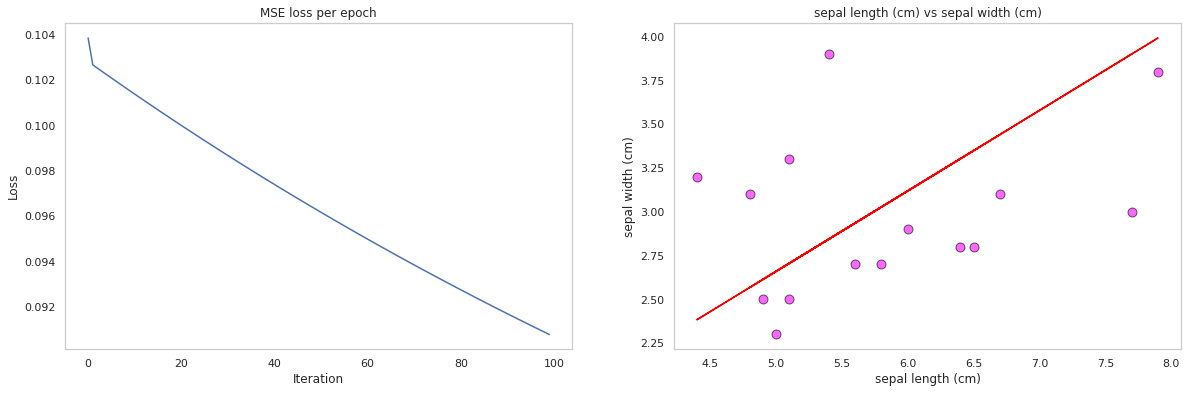

<Figure size 432x288 with 0 Axes>

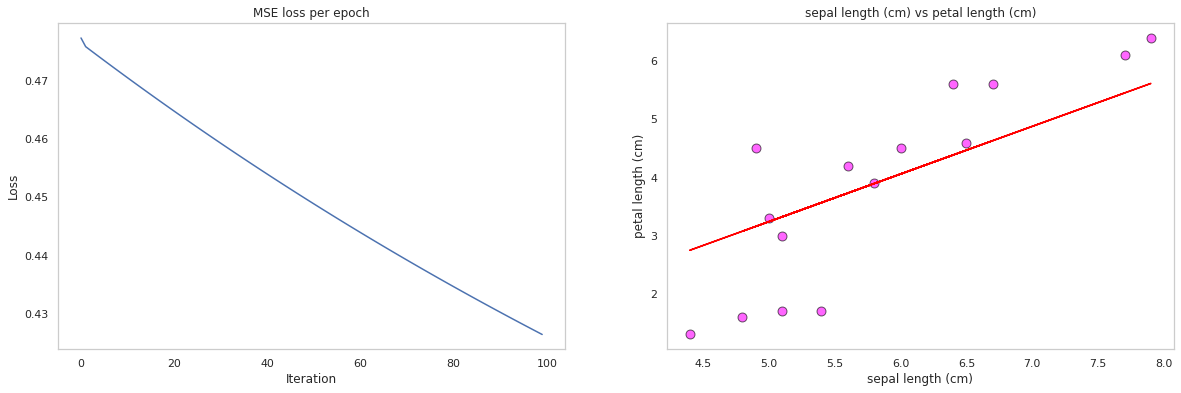

<Figure size 432x288 with 0 Axes>

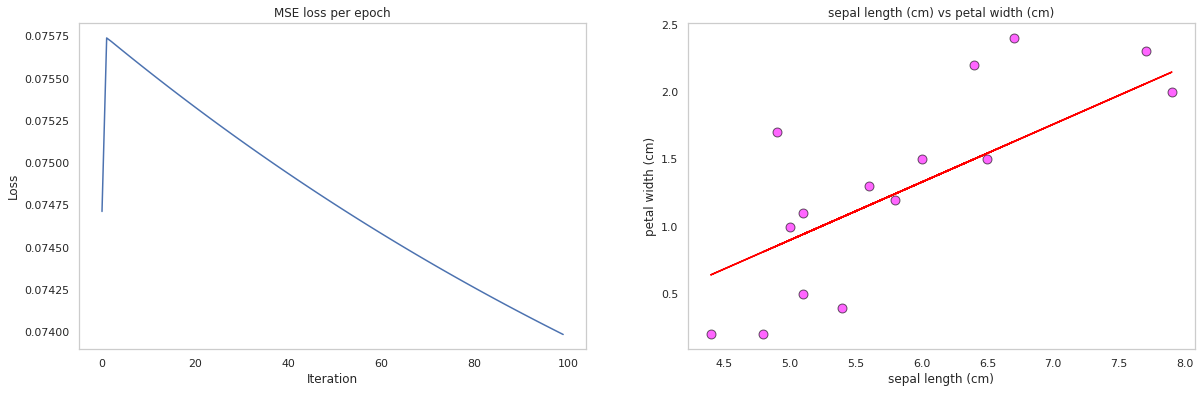

<Figure size 432x288 with 0 Axes>

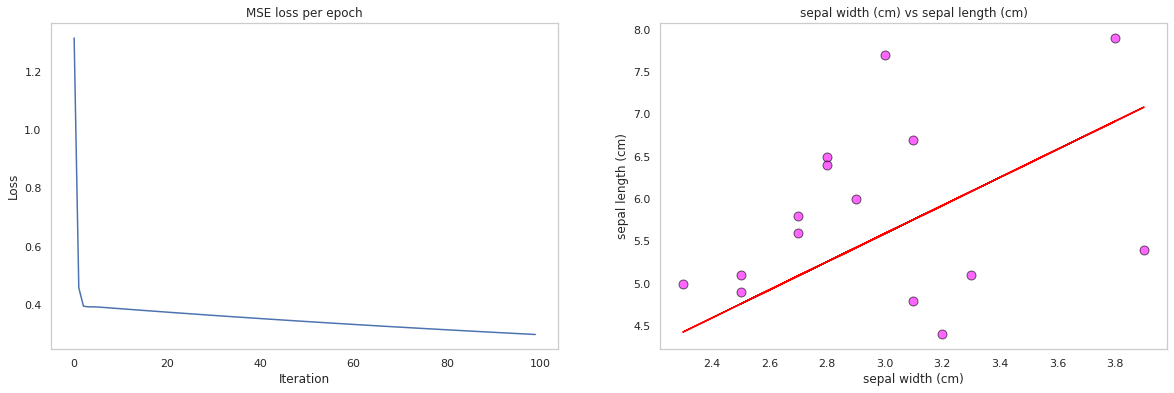

<Figure size 432x288 with 0 Axes>

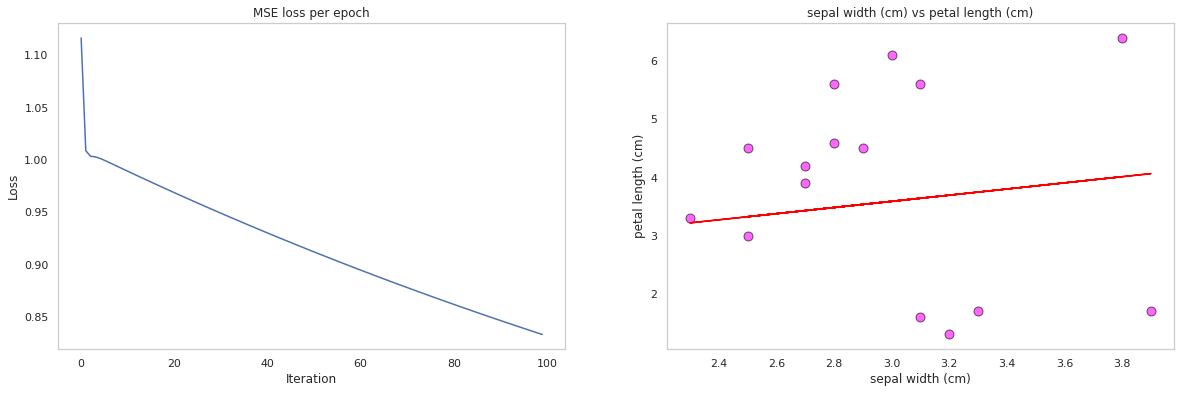

<Figure size 432x288 with 0 Axes>

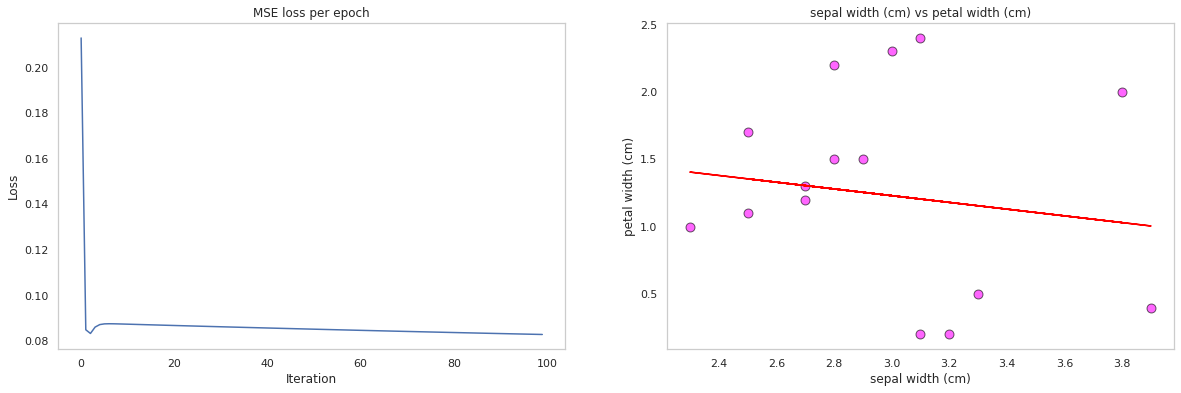

<Figure size 432x288 with 0 Axes>

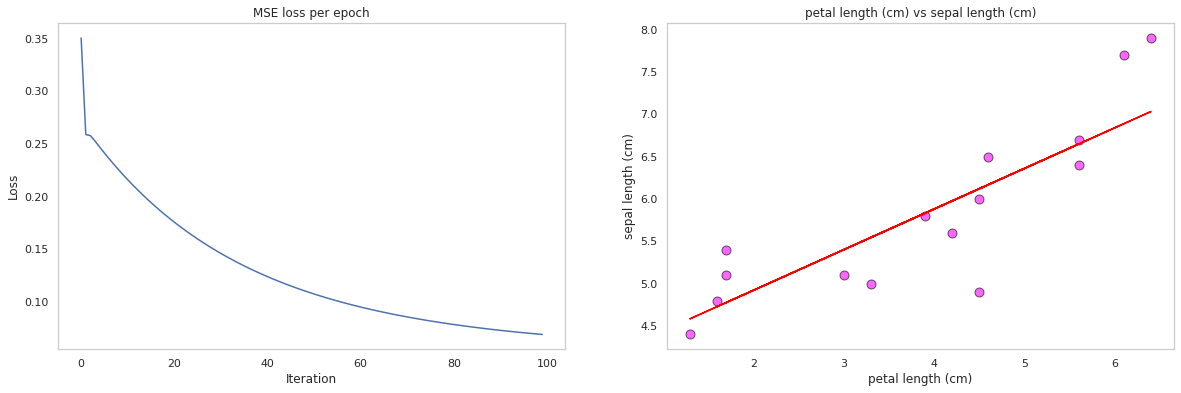

<Figure size 432x288 with 0 Axes>

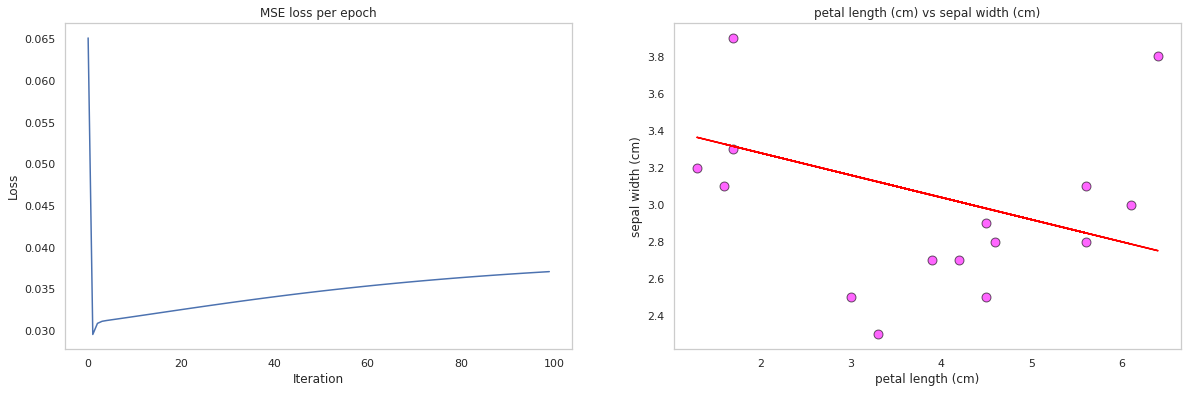

<Figure size 432x288 with 0 Axes>

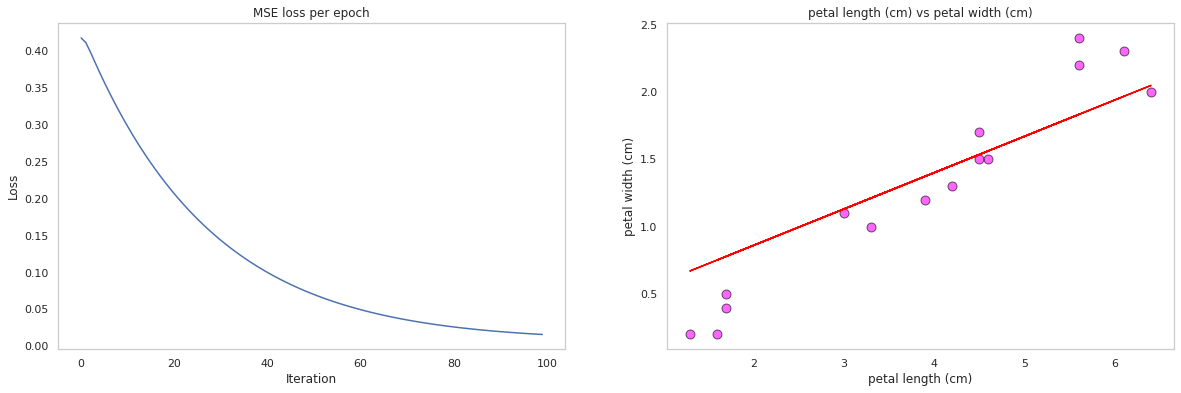

<Figure size 432x288 with 0 Axes>

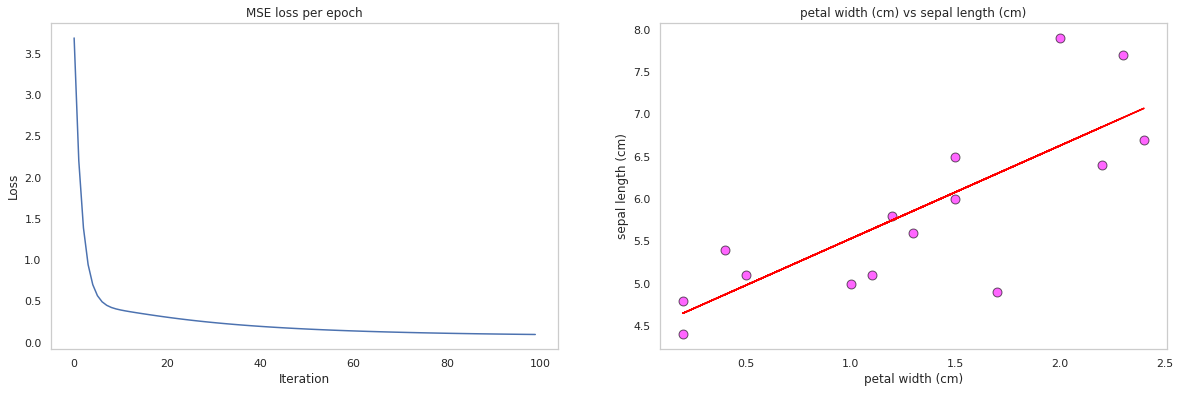

<Figure size 432x288 with 0 Axes>

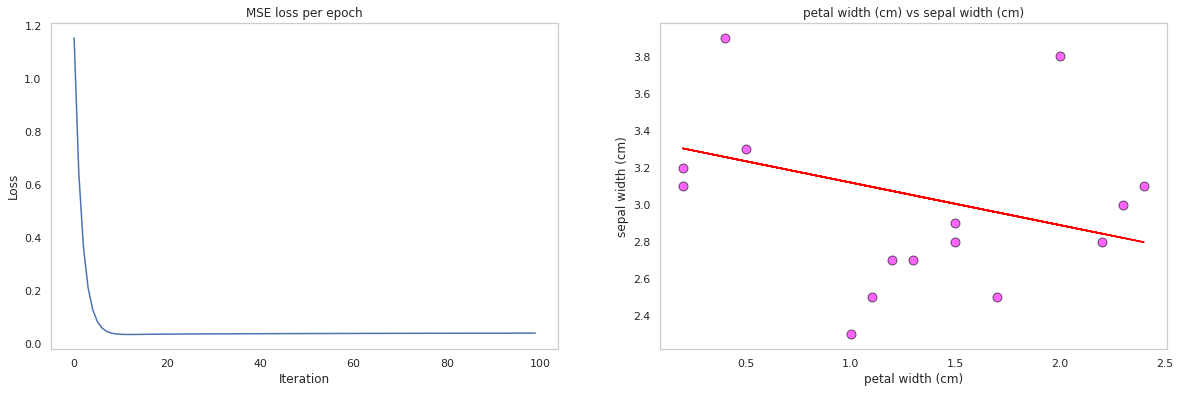

<Figure size 432x288 with 0 Axes>

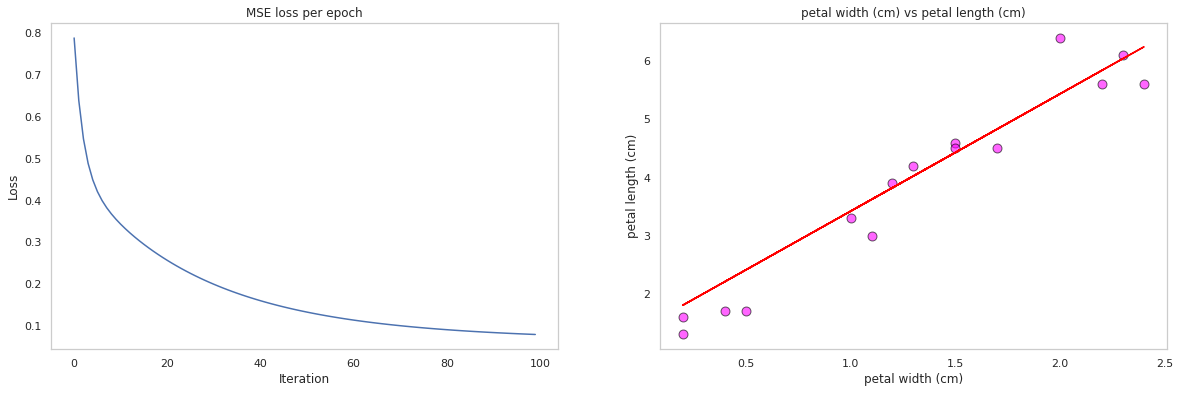

In [204]:
weights_and_bias_linear = {'Data':[], 'weight': [], 'bias': [], 'MSE': []}
for idx, item in enumerate(pairs):
  train_dataloader, _ = create_dataset(x_train[item[0]], x_train[item[1]], x_test[item[0]], x_test[item[1]])
  model, loss_values = train(model, epochs, train_dataloader)
  weight = round(model.linear.state_dict()['weight'][0][0].item(), 2)
  weights_and_bias_linear['Data'].append(f'{item[0]} vs {item[1]}')
  weights_and_bias_linear['weight'].append(weight)
  bias = round(model.linear.state_dict()['bias'].item(), 2)
  weights_and_bias_linear['bias'].append(bias)
  plot_loss_and_prediction_linear(loss_values, item, weight, bias, x_test[item[0]], x_test[item[1]], weights_and_bias_linear)
stats_linear = pd.DataFrame(weights_and_bias_linear)

In [205]:
stats_linear

,Data,weight,bias,MSE
0,sepal length (cm) vs sepal width (cm),0.46,0.36,0.289
1,sepal length (cm) vs petal length (cm),0.82,-0.86,1.078
2,sepal length (cm) vs petal width (cm),0.43,-1.25,0.212
3,sepal width (cm) vs sepal length (cm),1.66,0.61,1.183
4,sepal width (cm) vs petal length (cm),0.53,2.00,2.966
5,sepal width (cm) vs petal width (cm),-0.25,1.98,0.506
6,petal length (cm) vs sepal length (cm),0.48,3.96,0.277
7,petal length (cm) vs sepal width (cm),-0.12,3.52,0.216
8,petal length (cm) vs petal width (cm),0.27,0.32,0.097
9,petal width (cm) vs sepal length (cm),1.10,4.43,0.378


In [206]:
class logisticRegression(torch.nn.Module):
    def __init__(self, inputSize=1, outputSize=1):
        super().__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)
        # self.activation = torch.nn.Sigmoid()

    def forward(self, x):
        out = self.linear(x)
        # out = self.activation(x)
        return out

In [207]:
from matplotlib.colors import ListedColormap

def plot_loss_and_prediction_logistic(losses, weight1, weight2, bias, x_test, y_test, item, data, lr):
    sns.set(style="white")
    plt.clf()
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6));
    ax1.set_title(f"MSE loss per epoch")
    ax1.set_xlabel("Iteration")
    ax1.set_ylabel("Loss")
    sns.lineplot(x=range(len(losses)), y=losses, ax=ax1);

    cmap_light = ListedColormap(['#0476D0', '#FFAE42', '#50C878'])
    xx, yy = np.mgrid[min(x_test[item[0]])-0.01:max(x_test[item[0]])+.01:0.01, min(x_test[item[1]])-0.01:max(x_test[item[1]])+.01:0.01]

    grid = np.c_[xx.ravel(), yy.ravel()]
    batch = torch.from_numpy(grid).type(torch.float32)
    probs1=y_test
    y_pred = abs(np.round(x_test[item[0]]*weight1 + x_test[item[1]]*weight2+ bias))
    probs = abs(np.round(batch.T[0].T*weight1 + batch.T[1].T*weight2+ bias))
    try:
      acc=accuracy_score(y_test, y_pred)
    except ValueError:
      acc=0 
    data['accuracy'].append(acc)
    probs = probs.reshape(xx.shape)
    ax2.set_title(f"Decision boundary for lr={lr}", fontsize=14)
    ax2.pcolormesh(xx, yy, probs, cmap=cmap_light, shading='auto', alpha=0.6)
    data1 = pd.DataFrame({item[0]: x_test[item[0]], item[1]: x_test[item[1]], 'c': probs1})
    sns.scatterplot(data=data1, x=item[0], y=item[1], hue='c', palette='tab10', ax=ax2, s=100, edgecolor='black');
    plt.show();
    # plt.savefig(f"/content/drive/MyDrive/plot/logistic/{item[0]} vs {item[1]}");

In [208]:
columns = iris_X.columns.values
pairs = [[a, b] for idx, a in enumerate(columns) for b in columns if b!=a]
inputDim = 2     
outputDim = 1
learningRate = [0.0001, 0.001, 0.01, 0.1]
epochs = 100
model = logisticRegression(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()
# loss_function = torch.nn.MSELoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learningRate, weight_decay=0.01)
columns = iris_X.columns.values
pairs = [[a, b] for idx, a in enumerate(columns) for b in columns[idx+1:]]

<Figure size 432x288 with 0 Axes>

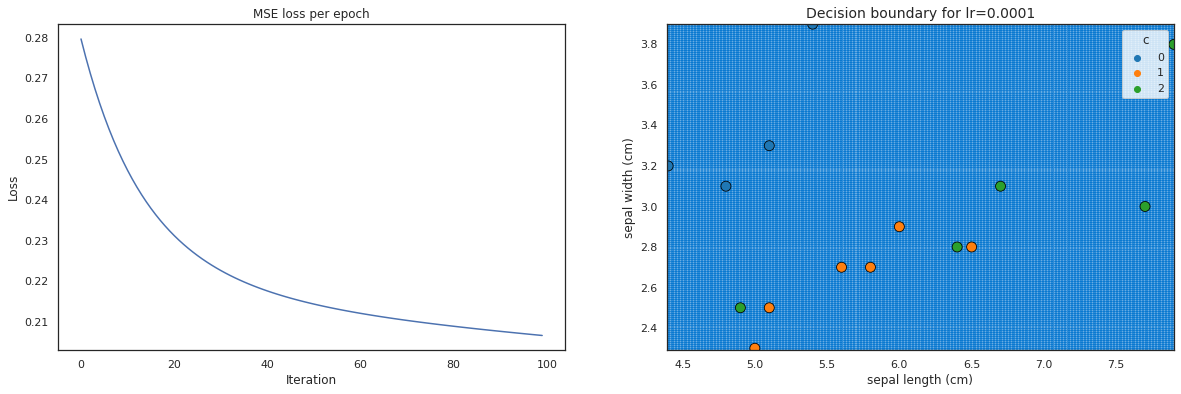

<Figure size 432x288 with 0 Axes>

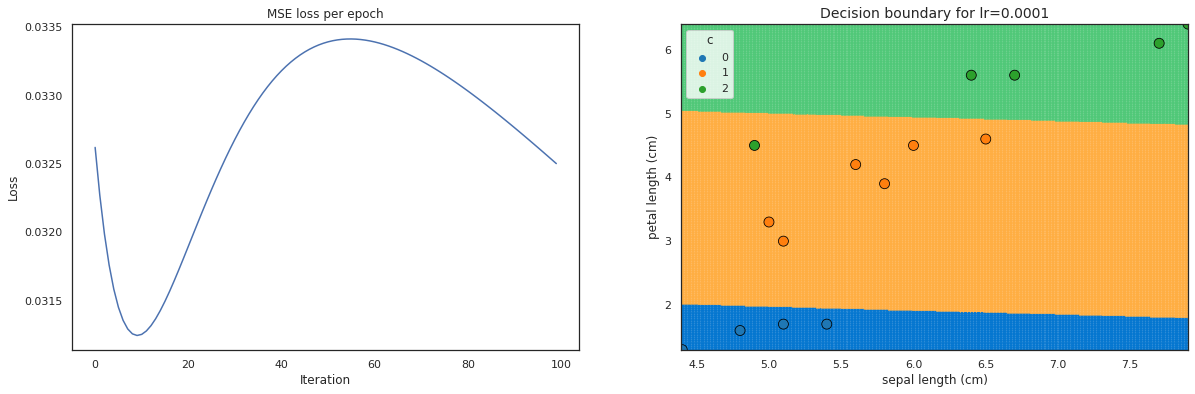

<Figure size 432x288 with 0 Axes>

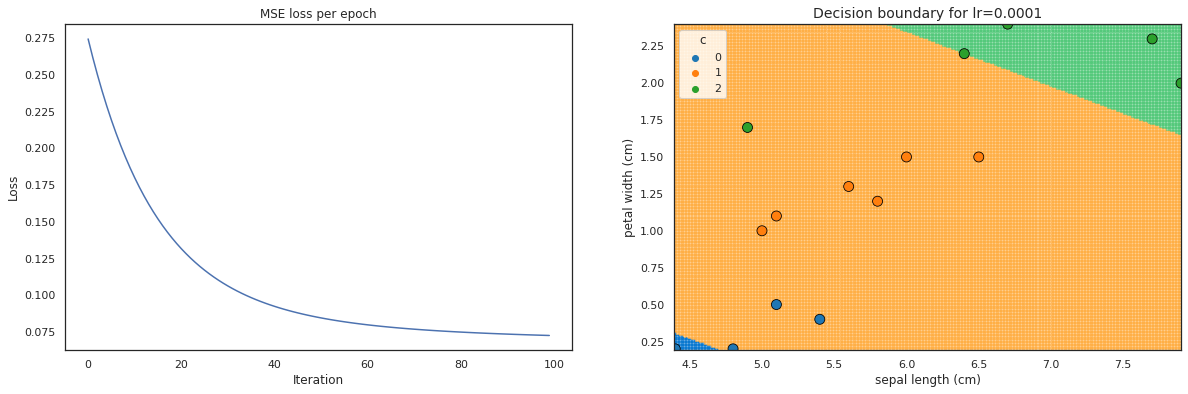

<Figure size 432x288 with 0 Axes>

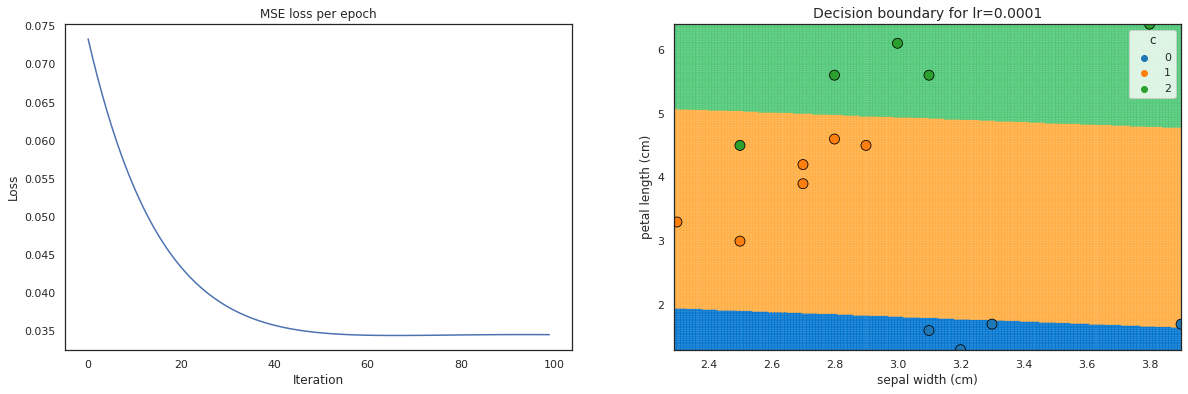

<Figure size 432x288 with 0 Axes>

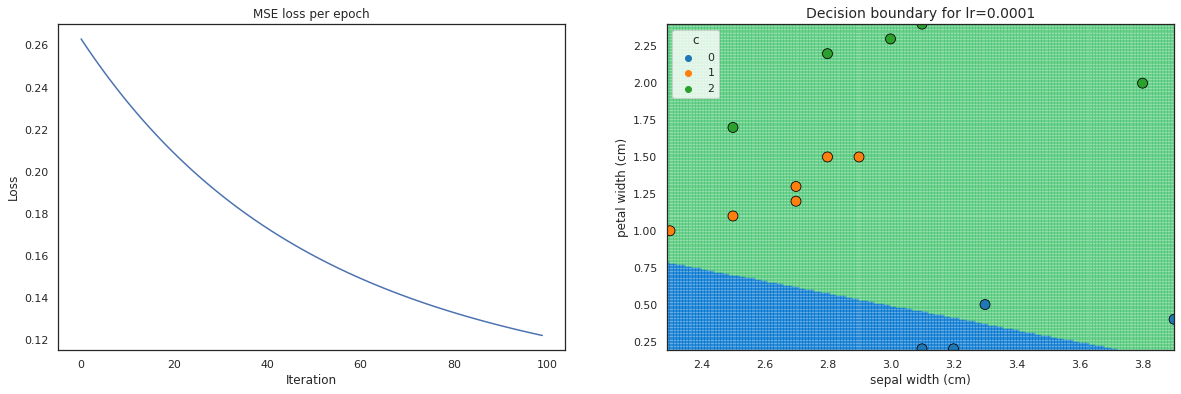

<Figure size 432x288 with 0 Axes>

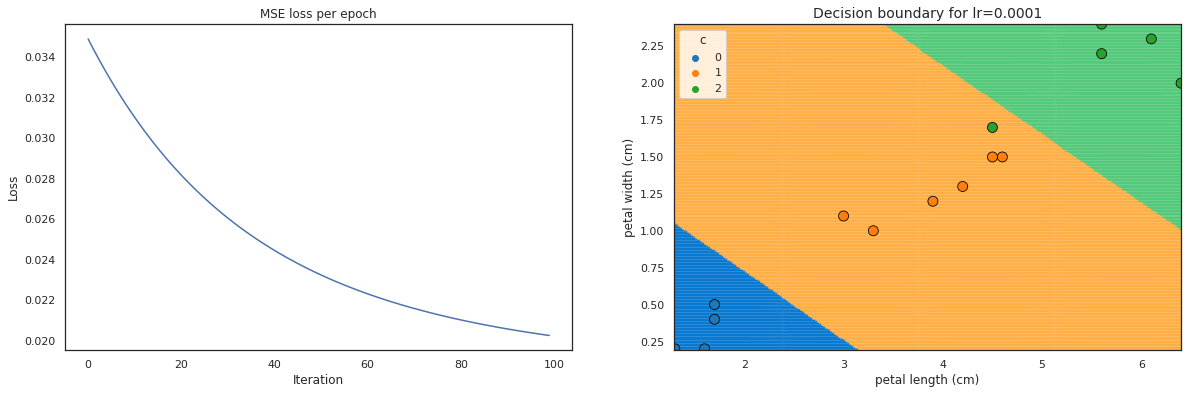

<Figure size 432x288 with 0 Axes>

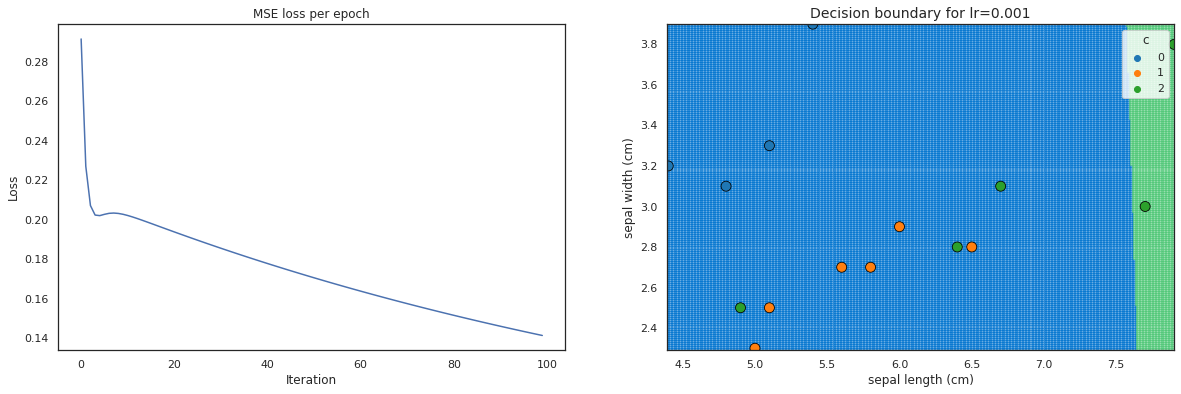

<Figure size 432x288 with 0 Axes>

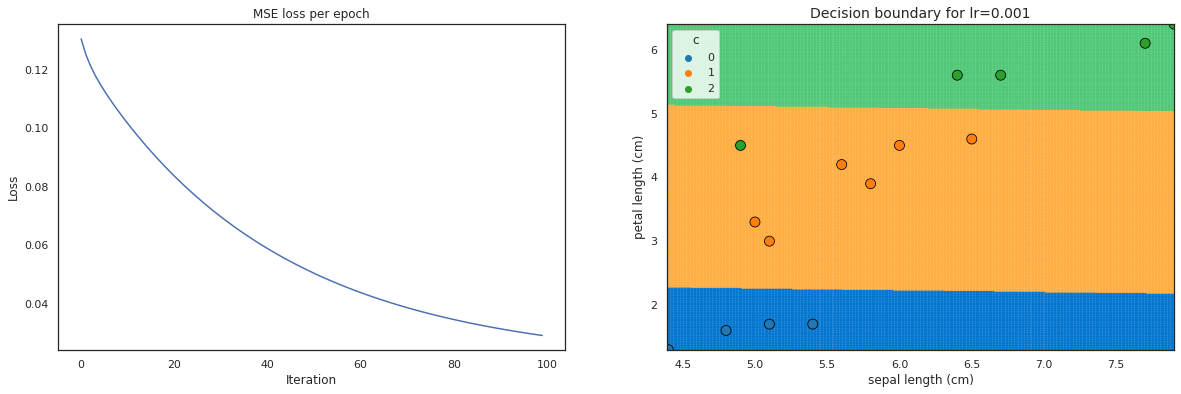

<Figure size 432x288 with 0 Axes>

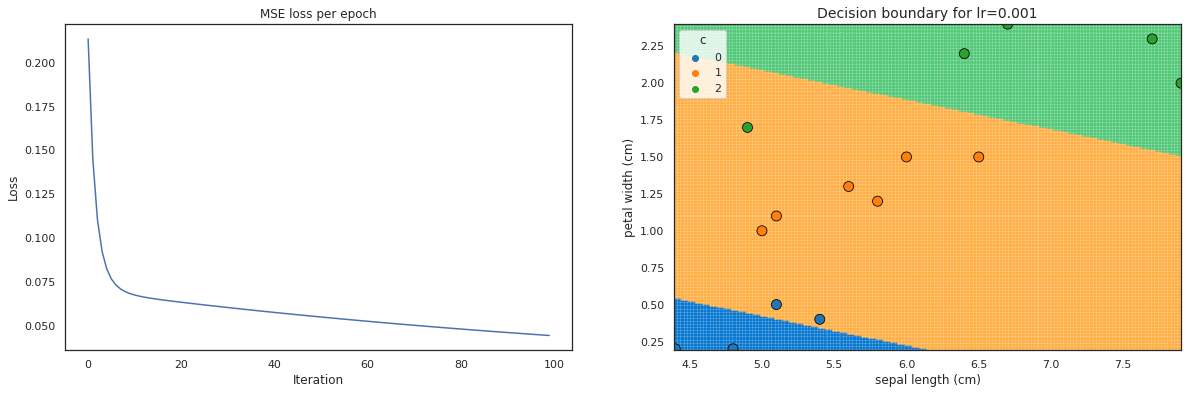

<Figure size 432x288 with 0 Axes>

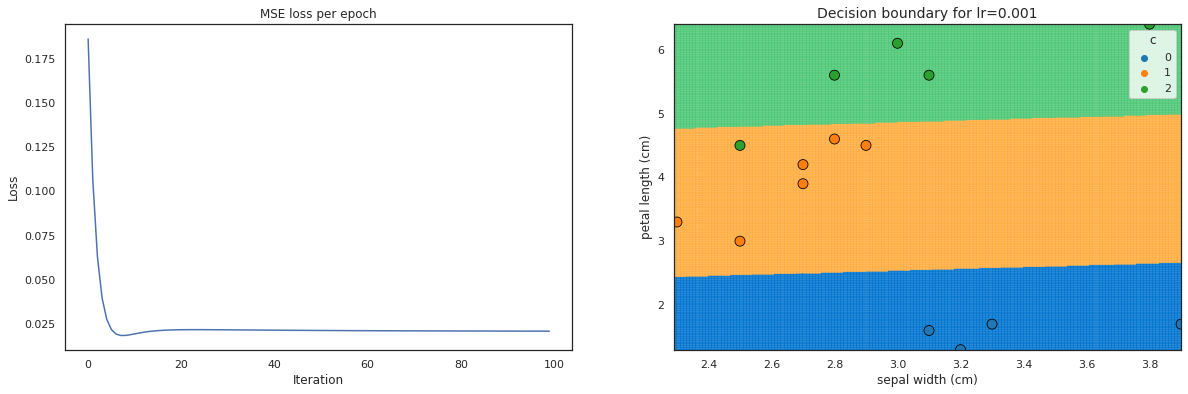

<Figure size 432x288 with 0 Axes>

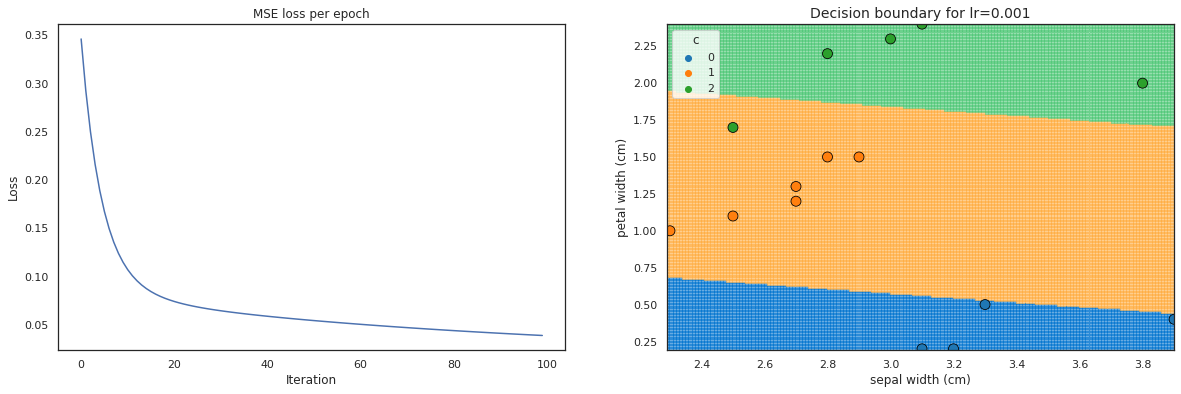

<Figure size 432x288 with 0 Axes>

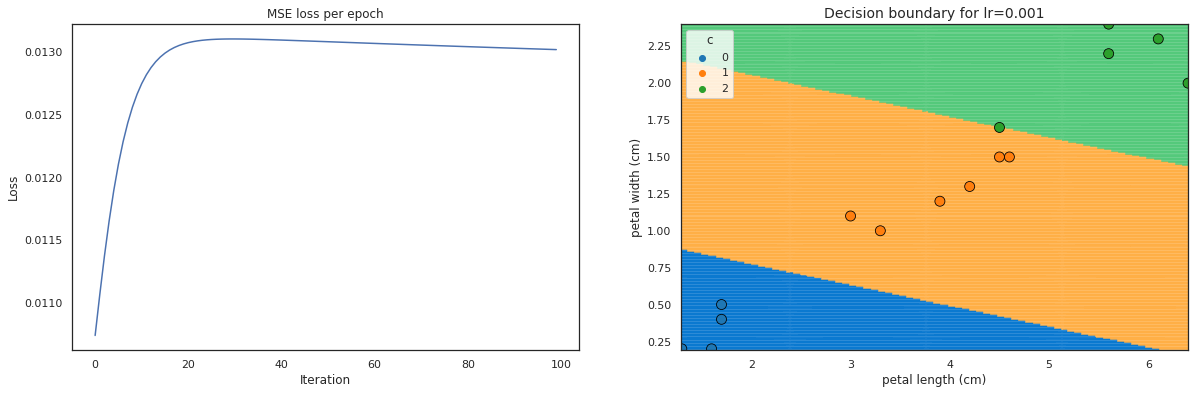

<Figure size 432x288 with 0 Axes>

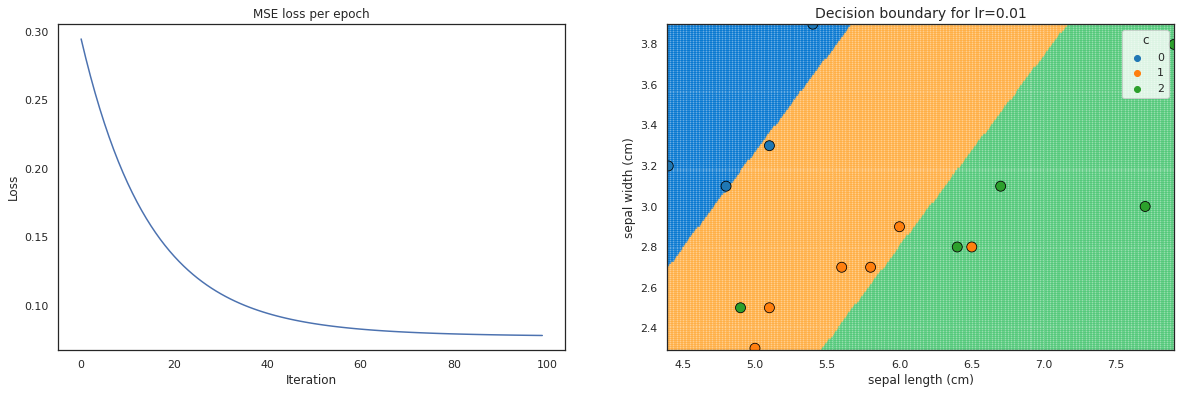

<Figure size 432x288 with 0 Axes>

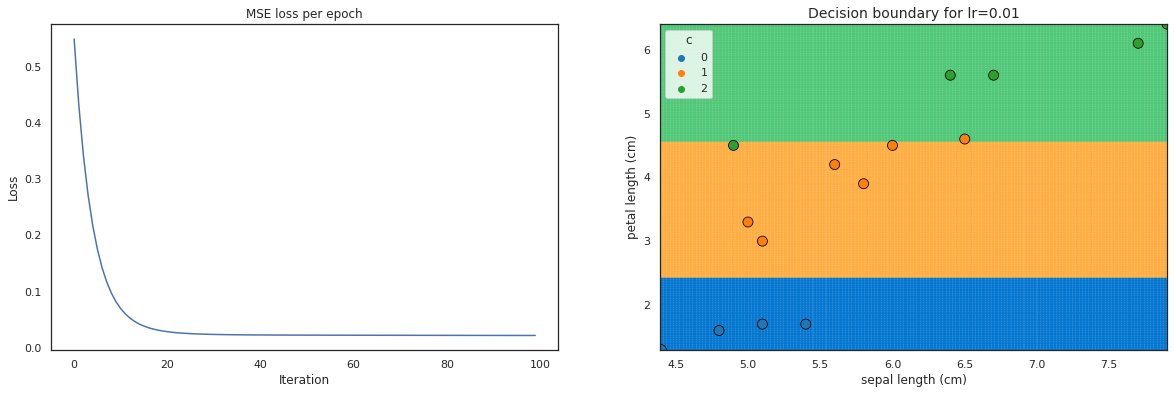

<Figure size 432x288 with 0 Axes>

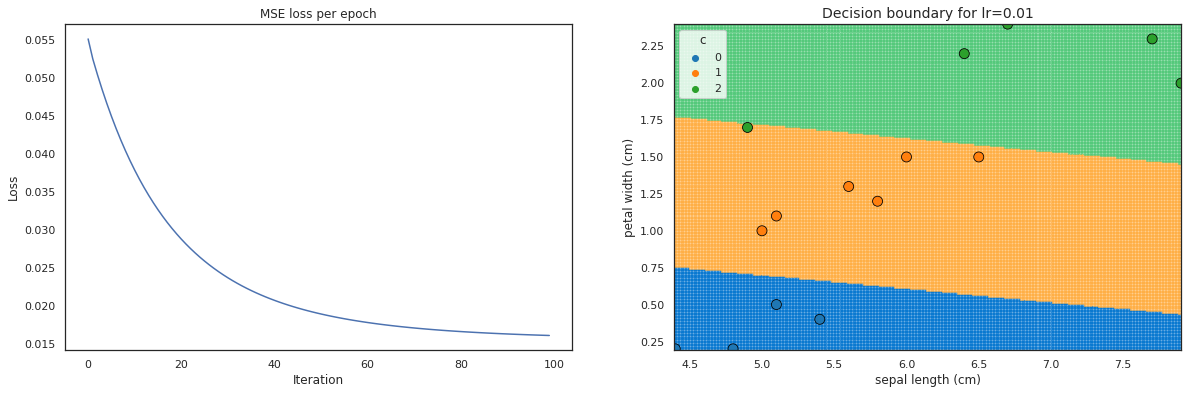

<Figure size 432x288 with 0 Axes>

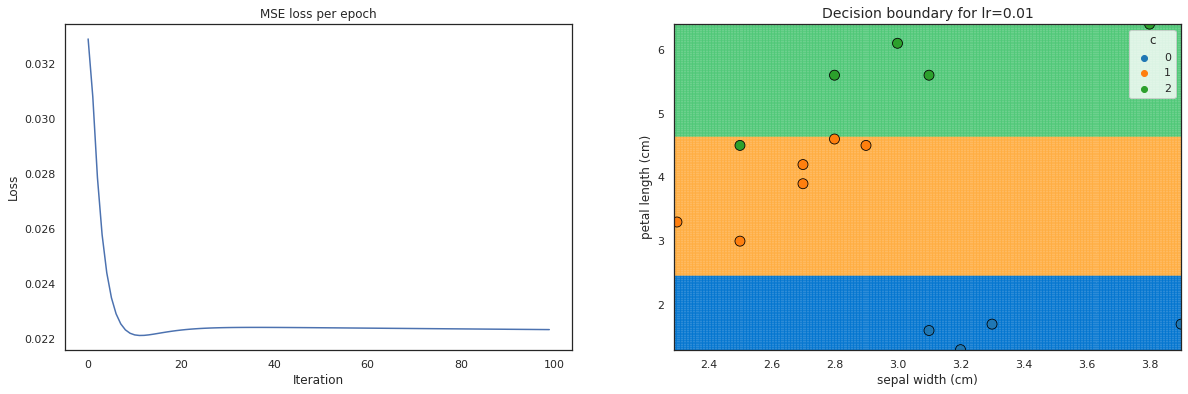

<Figure size 432x288 with 0 Axes>

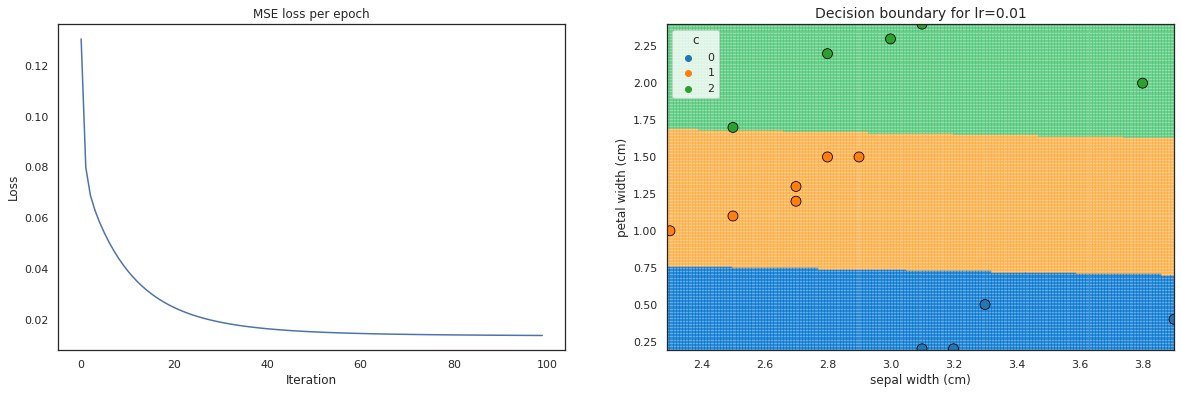

<Figure size 432x288 with 0 Axes>

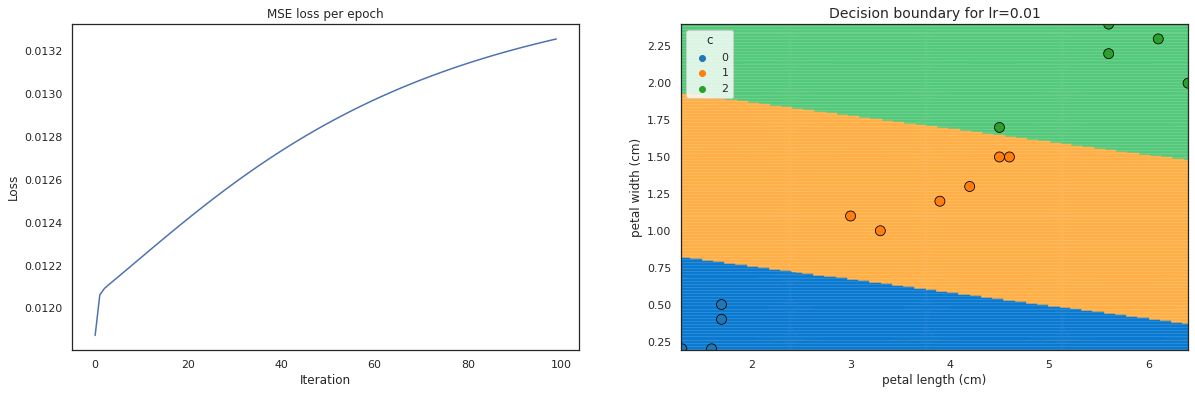

<Figure size 432x288 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


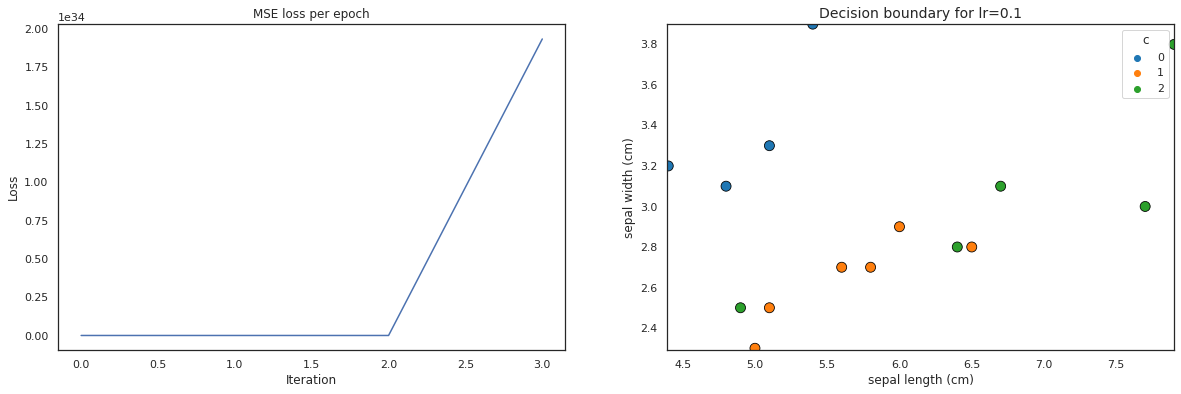

<Figure size 432x288 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


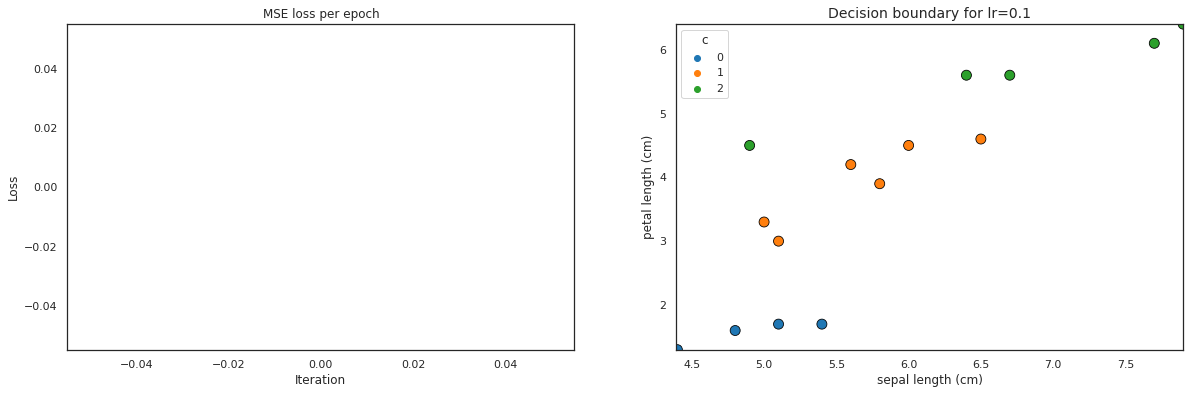

<Figure size 432x288 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


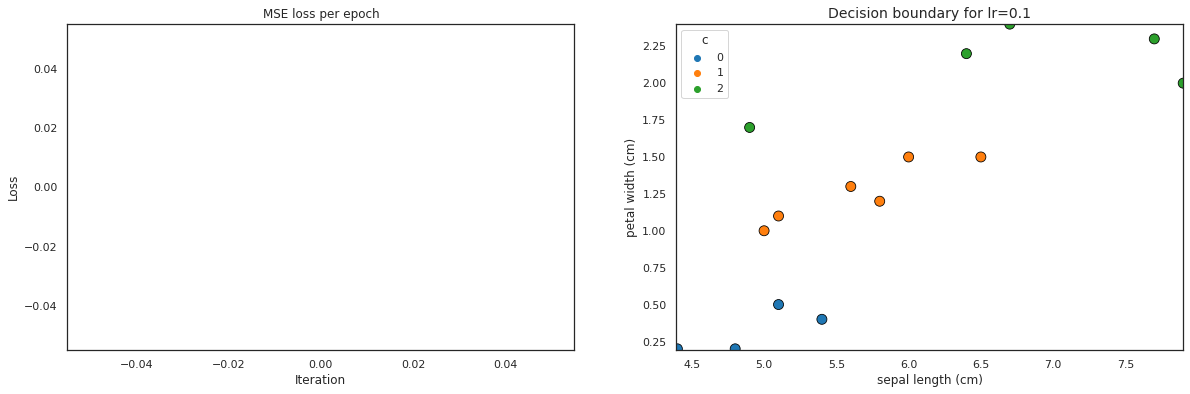

<Figure size 432x288 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


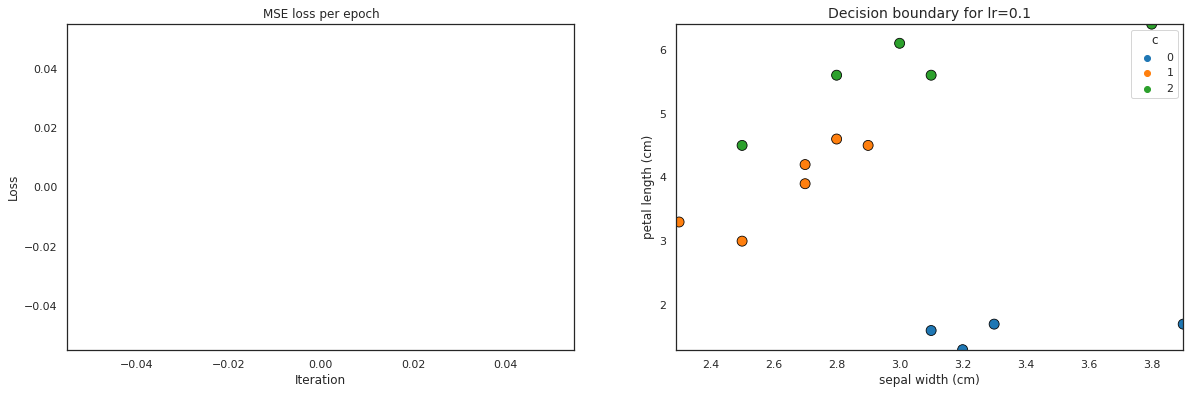

<Figure size 432x288 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


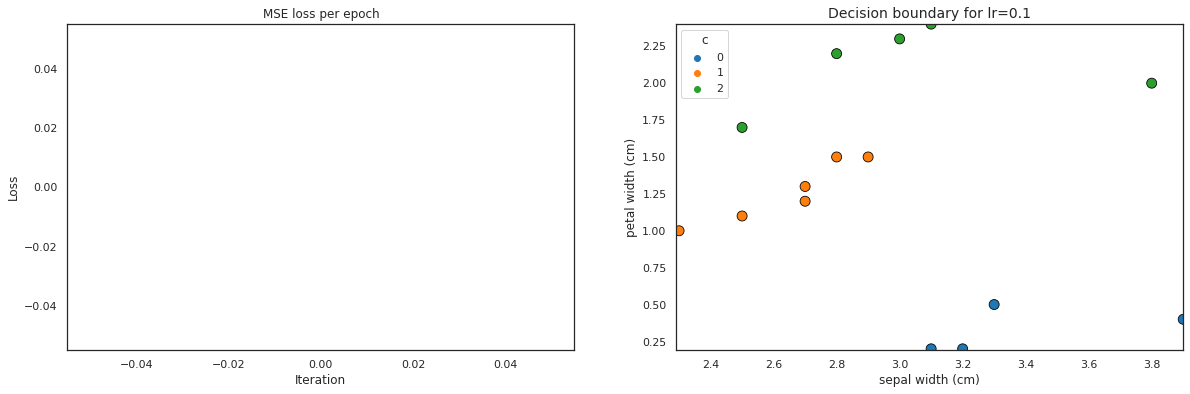

<Figure size 432x288 with 0 Axes>

<string>:6: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:993: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)


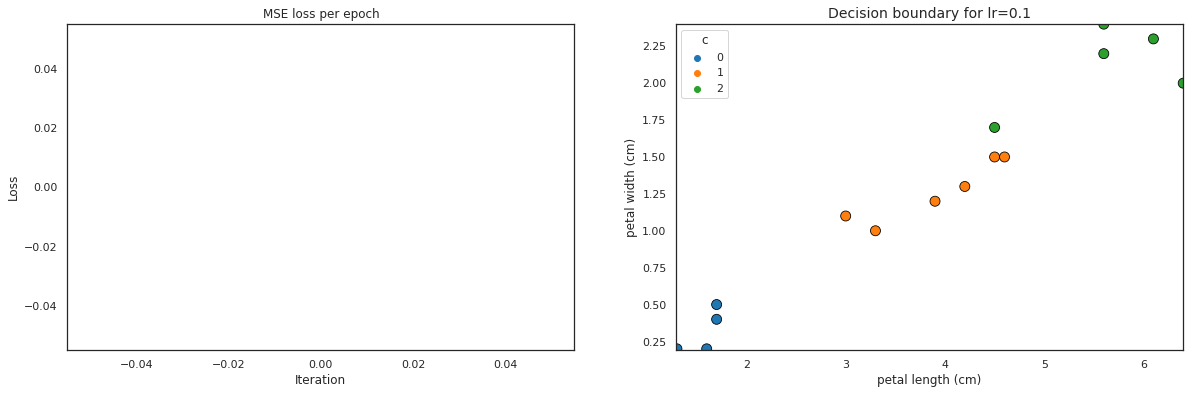

In [209]:
weights_and_bias_logistic = {'Data':[], 'weight_1': [], 'weight_2': [], 'bias': [], 'lr': [] , 'accuracy': []}
for lr in learningRate:
  for idx, item in enumerate(pairs):
    train_dataloader, _ = create_dataset(x_train[item], y_train, x_test[item], y_test)
    loss_function = torch.nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=0.01)
    model, loss_values = train(model, epochs, train_dataloader)
    weight1 = round(model.linear.state_dict()['weight'][0][0].item(), 2)
    weight2 = round(model.linear.state_dict()['weight'][0][1].item(), 2)
    bias = round(model.linear.state_dict()['bias'].item(), 2)
    weights_and_bias_logistic['Data'].append(f'{item[0]} vs {item[1]}')
    weights_and_bias_logistic['weight_1'].append(weight1)
    weights_and_bias_logistic['weight_2'].append(weight2)
    weights_and_bias_logistic['bias'].append(bias)
    weights_and_bias_logistic['lr'].append(lr)
    plot_loss_and_prediction_logistic(loss_values, weight1, weight2, bias, x_test, y_test, item, weights_and_bias_logistic, lr)
stats_logistic = pd.DataFrame(weights_and_bias_logistic) 
  # plot_loss_and_prediction_logistic(loss_values, item, weight1, weight2, bias, x_test[item], y_test)

In [210]:
stats_logistic

,Data,weight_1,weight_2,bias,lr,accuracy
0,sepal length (cm) vs sepal width (cm),0.06,0.32,-0.24,0.0001,0.400000
1,sepal length (cm) vs petal length (cm),0.02,0.33,-0.25,0.0001,0.933333
2,sepal length (cm) vs petal width (cm),0.14,0.38,-0.23,0.0001,0.733333
3,sepal width (cm) vs petal length (cm),0.06,0.32,-0.26,0.0001,0.866667
4,sepal width (cm) vs petal width (cm),0.17,0.41,-0.21,0.0001,0.533333
5,petal length (cm) vs petal width (cm),0.20,0.43,-0.21,0.0001,0.933333
6,sepal length (cm) vs sepal width (cm),0.23,0.01,-0.28,0.0010,0.533333
7,sepal length (cm) vs petal length (cm),0.01,0.35,-0.34,0.0010,0.933333
8,sepal length (cm) vs petal width (cm),0.12,0.60,-0.35,0.0010,0.800000
9,sepal width (cm) vs petal length (cm),-0.06,0.43,-0.41,0.0010,0.933333
